In [37]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("scores.csv")

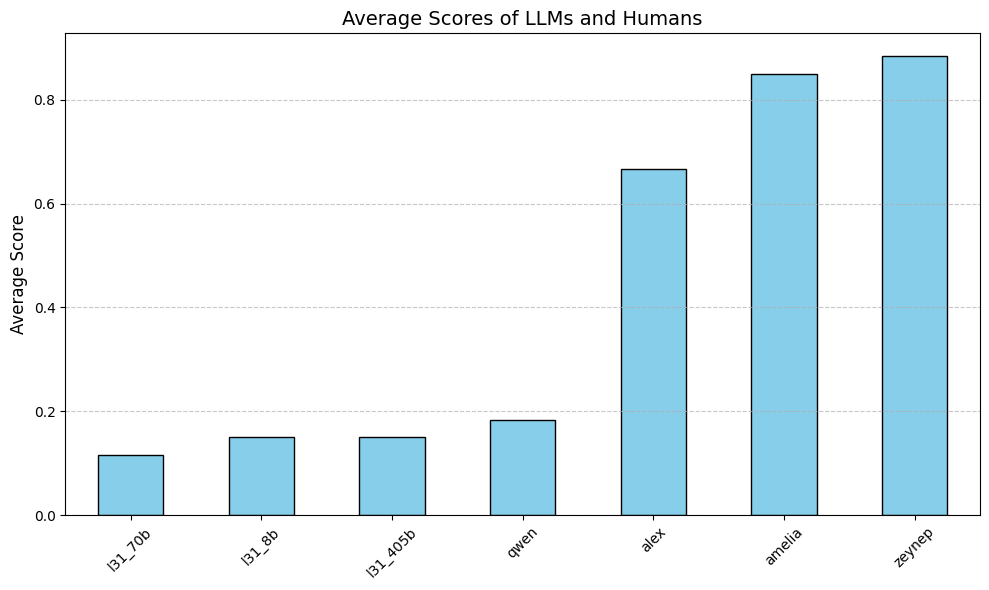

In [39]:
average_scores = data.iloc[:, 1:].mean()

plt.figure(figsize=(10, 6))
average_scores.sort_values().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Scores of LLMs and Humans', fontsize=14)
plt.ylabel('Average Score', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the chart
plt.savefig('averages.png')
plt.show()

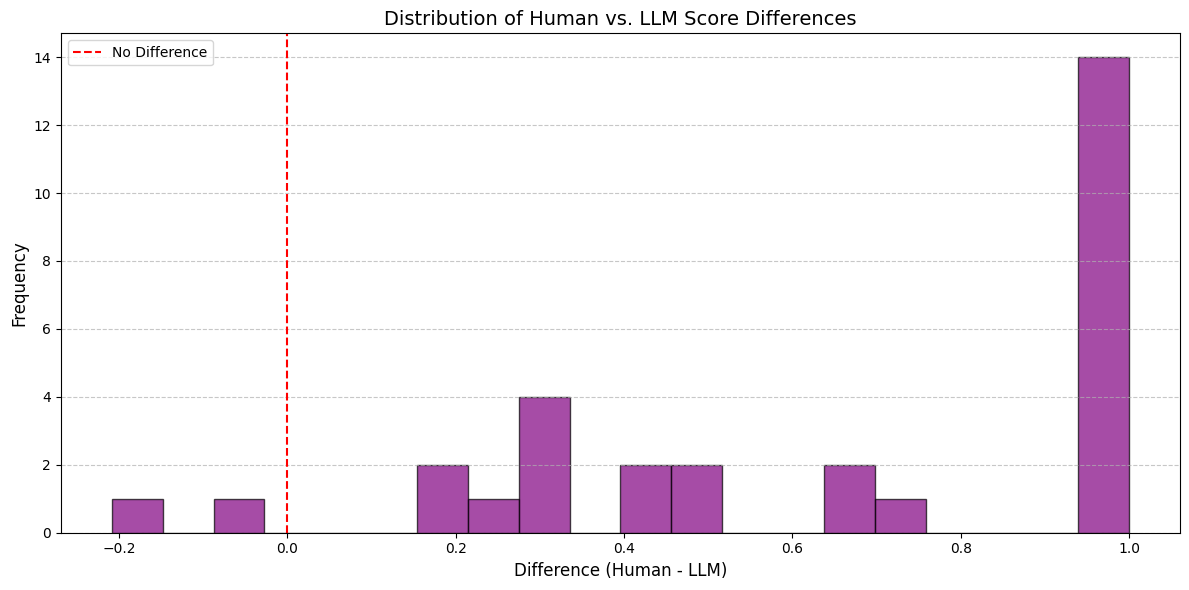

In [40]:
# Identify questions where LLMs significantly outperform humans or vice versa
llm_columns = ['l31_8b', 'l31_70b', 'l31_405b', 'qwen']
human_columns = ['zeynep', 'amelia', 'alex']

llm_mean_scores = data[llm_columns].mean(axis=1)
human_mean_scores = data[human_columns].mean(axis=1)

data['LLM Average'] = llm_mean_scores
data['Human Average'] = human_mean_scores
data['Difference (Human - LLM)'] = data['Human Average'] - data['LLM Average']

# Questions where humans significantly outperform LLMs
human_outperform_llm = data[data['Difference (Human - LLM)'] > 0.5]

# Questions where LLMs significantly outperform humans
llm_outperform_human = data[data['Difference (Human - LLM)'] < -0.5]

# Plot comparison for the difference in LLM vs. Human scores
plt.figure(figsize=(12, 6))
plt.hist(data['Difference (Human - LLM)'], bins=20, color='purple', edgecolor='black', alpha=0.7)
plt.title('Distribution of Human vs. LLM Score Differences', fontsize=14)
plt.xlabel('Difference (Human - LLM)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(0, color='red', linestyle='--', label='No Difference')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('differences.png')
plt.show()

/var/folders/w1/ksjdmg_555d4jcz50lxzqq300000gn/T/ipykernel_95424/31760770.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_first_15['LLM Average'] = llm_mean_scores_first_15
/var/folders/w1/ksjdmg_555d4jcz50lxzqq300000gn/T/ipykernel_95424/31760770.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_first_15['Human Average'] = human_mean_scores_first_15
/var/folders/w1/ksjdmg_555d4jcz50lxzqq300000gn/T/ipykernel_95424/31760770.py:13: SettingWithCopyWarning: 
A value is trying to be set on a cop

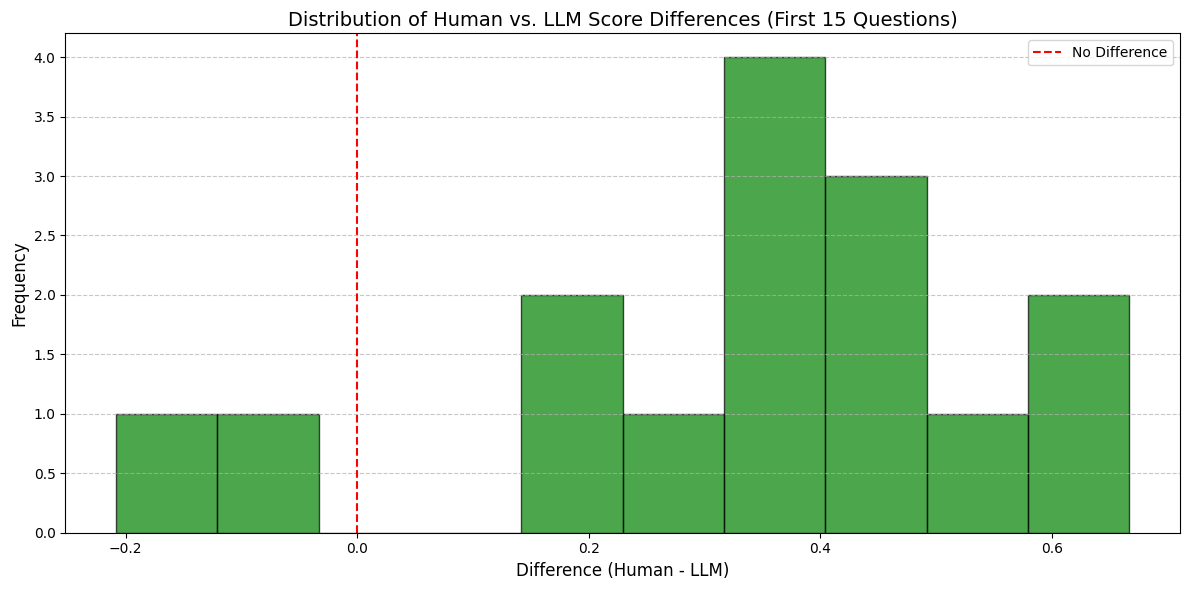

In [41]:
# Filter the data for the first 15 questions
data_first_15 = data.iloc[:15]

# Recalculate average and standard deviation of scores for the first 15 questions
average_scores_first_15 = data_first_15.iloc[:, 1:].mean()

# Recalculate LLM and Human averages and differences for the first 15 questions
llm_mean_scores_first_15 = data_first_15[llm_columns].mean(axis=1)
human_mean_scores_first_15 = data_first_15[human_columns].mean(axis=1)

data_first_15['LLM Average'] = llm_mean_scores_first_15
data_first_15['Human Average'] = human_mean_scores_first_15
data_first_15['Difference (Human - LLM)'] = data_first_15['Human Average'] - data_first_15['LLM Average']

human_outperform_human_first_15 = data_first_15[data_first_15['Difference (Human - LLM)'] > 0.5]
llm_outperform_llm_first_15 = data_first_15[data_first_15['Difference (Human - LLM)'] < -0.5]

plt.figure(figsize=(12, 6))
plt.hist(data_first_15['Difference (Human - LLM)'], bins=10, color='green', edgecolor='black', alpha=0.7)
plt.title('Distribution of Human vs. LLM Score Differences (First 15 Questions)', fontsize=14)
plt.xlabel('Difference (Human - LLM)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(0, color='red', linestyle='--', label='No Difference')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('differences_first15.png')
plt.show()

In [31]:
# Highlight specific questions with the largest absolute differences
largest_differences_first_15 = data.loc[
    data_first_15['Difference (Human - LLM)'].abs().nlargest(5).index, 
    ['Question', 'Difference (Human - LLM)']
]

largest_differences_first_15

,Question,Difference (Human - LLM)
7,How many enclosed spaces formed inside charact...,0.666667
10,Choose 3 cities that would form the corners of...,0.666667
3,I have 10 ton of a liquid mixture composed of ...,0.500000
0,What's an object depicted in impressionism but...,0.458333
5,In a classroom where there are 9 male students...,0.416667


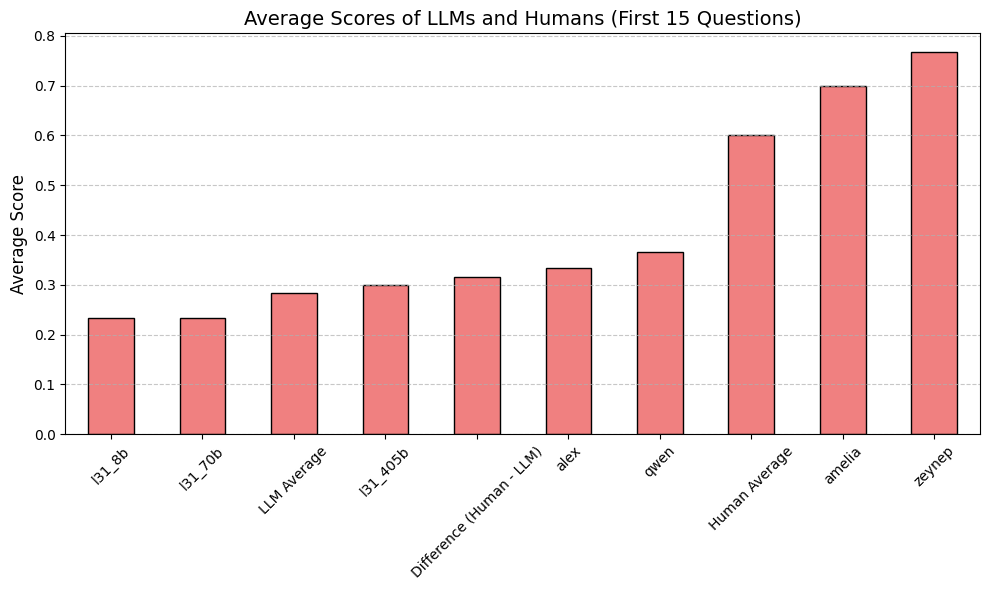

In [42]:
# Plot the average scores as a bar chart for the first 15 questions
plt.figure(figsize=(10, 6))
average_scores_first_15.sort_values().plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Average Scores of LLMs and Humans (First 15 Questions)', fontsize=14)
plt.ylabel('Average Score', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the chart
plt.savefig('averages_first15.png')
plt.show()

In [43]:
# Identify questions from the first 15 where LLMs outperformed humans
llm_outperform_human_first_15 = data_first_15[data_first_15['Difference (Human - LLM)'] < 0]

# Select relevant columns to display
llm_outperform_human_questions = llm_outperform_human_first_15[['Question', 'Difference (Human - LLM)']]

llm_outperform_human_questions

,Question,Difference (Human - LLM)
1,You've just discovered the Americas. Say hi to...,-0.083333
6,How many times does 's' occur in MasSachUseTts,-0.208333
